# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'0.24.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
df = movies[movies.title.str.contains('Harry Potter', case=False)]
df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [12]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [14]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [15]:
len(movies[(movies.year >= 2000)&(movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [16]:
len( movies[movies.title == 'Hamlet'])


20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
movies[(movies.title == 'Hamlet') & (movies.year >= 2000)].sort_values(by='year',ascending = True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [21]:
len(cast[(cast.title == 'Inception') & (cast.n.isnull())])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
len(cast[(cast.title == 'Inception') & (cast.n.notnull())])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [25]:
(cast[(cast.title == 'Inception') & (cast.n.notnull())]).sort_values(by='n',ascending = False).iloc[:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [32]:
cast[cast.character == 'Albus Dumbledore'].title

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object

In [33]:
cast[cast.character == 'Albus Dumbledore'].name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Timothy Tedmanson'], dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [35]:
len(cast[cast.name == 'Keanu Reeves'].character.unique())

56

In [36]:
cast[(cast.name == 'Keanu Reeves') & (cast.n.notnull()) &  (cast.year >=1999)].sort_values(by='year', ascending = True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [41]:
cast[(cast.year>=1950) & (cast.year <=1960)].groupby('type').nunique()

,title,year,name,type,character,n
type,,,,,,
actor,11175,11,35827,1,101100,151
actress,10909,11,19690,1,39468,109


In [42]:
cast[(cast.year>=2007) & (cast.year <=2017)].groupby('type').nunique()

,title,year,name,type,character,n
type,,,,,,
actor,65740,11,494404,1,421969,609
actress,63105,11,297348,1,224631,599


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [43]:
cast[(cast.year>=2000) & (cast.n.notnull())].nunique()

title         58554
year             21
name         576890
type              2
character    501377
n               705
dtype: int64

In [44]:
cast[(cast.year>=2000) & (cast.n.isnull())].nunique()

title         73996
year             27
name         560984
type              2
character    382872
n                 0
dtype: int64

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [15]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

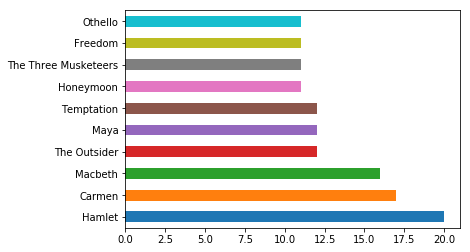

In [16]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [52]:
movies[movies.year>=2000].groupby('year').count().sort_values(by='title', ascending = False).iloc[:3]


,title
year,
2017,11474
2016,9440
2015,8702


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

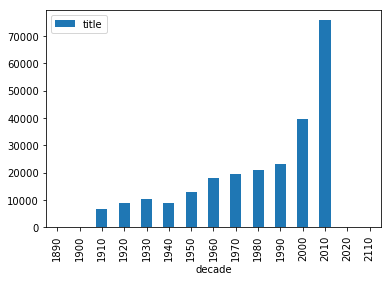

In [58]:
movies['decade'] = (movies.year // 10)*10
decade_count = movies.groupby('decade').count().sort_values(by='decade')
decade_count['decade'] = decade_count.index
decade_count.plot.bar(x='decade',y='title')


### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [59]:
cast.groupby('character').count().sort_values(by = 'name', ascending = False).iloc[:10]

,title,year,name,type,n
character,,,,,
Himself,20746,20746,20746,20746,7806
Dancer,12477,12477,12477,12477,5635
Extra,11948,11948,11948,11948,4299
Reporter,8434,8434,8434,8434,2722
Student,7773,7773,7773,7773,2309
Doctor,7669,7669,7669,7669,3991
Party Guest,7245,7245,7245,7245,1909
Policeman,7029,7029,7029,7029,3254
Nurse,6999,6999,6999,6999,3327


In [61]:
cast[cast.character == 'Herself'].groupby('name').count().sort_values(by = 'title', ascending = False).iloc[:10]

,title,year,type,character,n
name,,,,,
Queen Elizabeth II,12,12,12,12,0
Joyce Brothers,9,9,9,9,9
Luisa Horga,9,9,9,9,9
Mar?a Luisa (V) Mart?n,9,9,9,9,9
Hillary Clinton,8,8,8,8,0
Margaret Thatcher,8,8,8,8,0
In?s J. Southern,6,6,6,6,6
Marta Berrocal,6,6,6,6,5
Oprah Winfrey,6,6,6,6,2


In [62]:
cast[cast.character == 'Himself'].groupby('name').count().sort_values(by = 'title', ascending = False).iloc[:10]

,title,year,type,character,n
name,,,,,
Adolf Hitler,99,99,99,99,1
Richard Nixon,44,44,44,44,1
Ronald Reagan,41,41,41,41,0
John F. Kennedy,37,37,37,37,1
George W. Bush,25,25,25,25,1
Winston Churchill,24,24,24,24,1
Martin Luther King,23,23,23,23,1
Bill Clinton,22,22,22,22,0
Ron Jeremy,22,22,22,22,17


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [65]:
cast[cast.character.str.startswith('Zombie')].groupby('character').count().sort_values(by = 'title', ascending = False).iloc[:10]

,title,year,name,type,n
character,,,,,
Zombie,6264,6264,6264,6264,2068
Zombie Horde,206,206,206,206,9
Zombie - Protestor - Victim,78,78,78,78,9
Zombie Extra,70,70,70,70,4
Zombie Dancer,43,43,43,43,13
Zombie Girl,36,36,36,36,11
Zombie #1,36,36,36,36,19
Zombie #2,31,31,31,31,12
Zombie Vampire,25,25,25,25,0


In [66]:
cast[cast.character.str.startswith('Police')].groupby('character').count().sort_values(by = 'title', ascending = False).iloc[:10]

,title,year,name,type,n
character,,,,,
Policeman,7029,7029,7029,7029,3254
Police Officer,4808,4808,4808,4808,1777
Police Inspector,742,742,742,742,425
Police Sergeant,674,674,674,674,304
Police officer,539,539,539,539,194
Police,456,456,456,456,275
Policewoman,415,415,415,415,272
Police Chief,410,410,410,410,247
Police Captain,387,387,387,387,197


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [76]:
df = cast[cast.name=='Keanu Reeves'].sort_values(by = 'year', ascending = True)
# df = cast[cast.name=='Keanu Reeves'].groupby('year').count().sort_values(by = 'year', ascending = True)
df.groupby('year').nunique().character

year
1985    1
1986    3
1988    4
1989    2
1990    2
1991    3
1992    1
1993    4
1994    1
1995    2
1996    2
1997    2
1999    3
2000    3
2001    2
2003    2
2005    3
2006    2
2008    2
2009    1
2010    1
2012    1
2013    2
2014    1
2015    1
2016    5
2017    3
2018    1
2019    1
Name: character, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


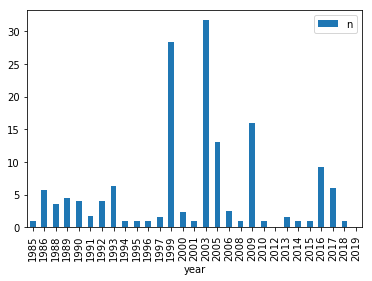

In [90]:
kr_df = cast[cast.name == 'Keanu Reeves']
kr_df_mean = kr_df.groupby('year').mean()
kr_df_mean['year'] = kr_df_mean.index
kr_df_mean.plot.bar(x='year',y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

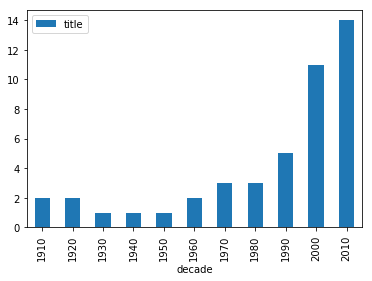

In [83]:
hdf = movies[movies.title.str.contains('Hamlet')].groupby('decade').nunique()
hdf['decade'] = hdf.index
hdf.plot.bar(x='decade',y='title')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [114]:
cast['decade'] = (cast.year //10)*10
cast[(cast.n == 1) & (cast.decade == 1960)].groupby('type').count()

,title,year,name,character,n,decade
type,,,,,,
actor,8320,8320,8320,8320,8320,8320
actress,3503,3503,3503,3503,3503,3503


In [115]:
cast[(cast.n == 1) & (cast.decade == 2000)].groupby('type').count()

,title,year,name,character,n,decade
type,,,,,,
actor,18557,18557,18557,18557,18557,18557
actress,7787,7787,7787,7787,7787,7787


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [108]:
fo_roles = cast[cast.name == 'Frank Oz'].groupby(['year','title']).nunique()
fo_roles[fo_roles.character>1].sort_index()

title  year  name  type  character  \
year title                                                                      
1979 The Muppet Movie                          1     1     1     1          8   
1981 An American Werewolf in London            1     1     1     1          2   
     The Great Muppet Caper                    1     1     1     1          6   
1982 The Dark Crystal                          1     1     1     1          2   
1984 The Muppets Take Manhattan                1     1     1     1          7   
1985 Follow That Bird                          1     1     1     1          3   
1992 The Muppet Christmas Carol                1     1     1     1          7   
1996 Muppet Treasure Island                    1     1     1     1          4   
1999 Muppets from Space                        1     1     1     1          4   
     The Adventures of Elmo in Grouchland      1     1     1     1          3   

                                           n  
year title                                    
1979 The Muppet Movie                      1  
1981 An American Werewolf in London        1  
     The Great Muppet Caper                1  
1982 The Dark Crystal                      1  
1984 The Muppets Take Manhattan            1  
1985 Follow That Bird                      1  
1992 The Muppet Christmas Carol            1  
1996 Muppet Treasure Island                1  
1999 Muppets from Space                    1  
     The Adventures of Elmo in Grouchland  1

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [110]:
fo_roles = cast[cast.name == 'Frank Oz'].groupby(['character']).count()
fo_roles[fo_roles.title>1].index

Index(['Animal', 'Bert', 'Cookie Monster', 'Fozzie Bear', 'Grover',
       'Miss Piggy', 'Sam the Eagle', 'Yoda'],
      dtype='object', name='character')

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

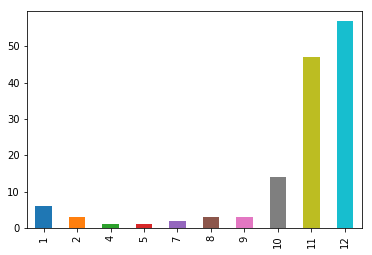

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

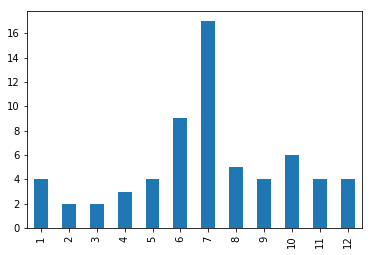

In [118]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

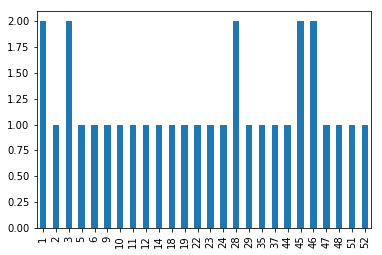

In [119]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [127]:
kr_merge = release_dates.merge(cast[cast.name=='Keanu Reeves'],how='inner', left_on = 'title', right_on = 'title')
kr_merge[(kr_merge.n ==1) & (kr_merge.country =='USA')][['year_x','title']].sort_values(by = 'year_x')

,year_x,title
797,1922,Speed
799,1936,Speed
873,1968,Sweet November
1289,1988,The Night Before
92,1989,Bill & Ted's Excellent Adventure
83,1991,Bill & Ted's Bogus Journey
584,1993,Little Buddha
802,1994,Speed
515,1995,Johnny Mnemonic
63,1995,A Walk in the Clouds


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

In [131]:
kr_merge['month'] = kr_merge.date.dt.month
kr_merge.head()

,title,year_x,country,date,year_y,name,type,character,n,decade,month
0,47 Ronin,2013,Japan,2013-12-06,2013,Keanu Reeves,actor,Kai,1.0,2010,12
1,47 Ronin,2013,Malaysia,2013-12-19,2013,Keanu Reeves,actor,Kai,1.0,2010,12
2,47 Ronin,2013,Singapore,2013-12-19,2013,Keanu Reeves,actor,Kai,1.0,2010,12
3,47 Ronin,2013,Taiwan,2013-12-24,2013,Keanu Reeves,actor,Kai,1.0,2010,12
4,47 Ronin,2013,Canada,2013-12-25,2013,Keanu Reeves,actor,Kai,1.0,2010,12


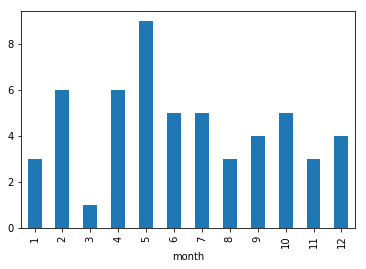

In [143]:
kr_merge[kr_merge.country=='USA'].groupby(by='month').nunique().title.sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

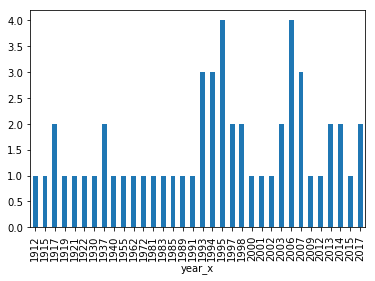

In [147]:
im_merge = release_dates.merge(cast[cast.name=='Ian McKellen'],how='inner', left_on = 'title', right_on = 'title')
im_merge[(im_merge.n ==1) & (im_merge.country =='USA')][['year_x','title']].sort_values(by = 'year_x')
im_merge[im_merge.country=='USA'].groupby(by='year_x').nunique().title.sort_index().plot(kind='bar')